In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

df=pd.read_csv("/content/housing_price_dataset.csv")
print(df.head(100))
print(df.shape)

    SquareFeet  Bedrooms  Bathrooms Neighborhood  YearBuilt          Price
0         2126         4          1        Rural       1969  215355.283618
1         2459         3          2        Rural       1980  195014.221626
2         1860         2          1       Suburb       1970  306891.012076
3         2294         2          1        Urban       1996  206786.787153
4         2130         5          2       Suburb       2001  272436.239065
..         ...       ...        ...          ...        ...            ...
95        2795         2          1        Rural       1977  305658.563853
96        2845         4          2        Urban       1996  318297.256578
97        2500         4          3        Rural       1984  230749.276337
98        1702         5          3        Urban       1970  201925.840889
99        1401         4          3       Suburb       1982  149576.681143

[100 rows x 6 columns]
(50000, 6)


In [128]:
from datetime import date
#df.YearBuilt = pd.to_datetime(df.YearBuilt, format='%Y')
df['age_of_the_house']= date.today().year-df['YearBuilt']
le = LabelEncoder()
df.Neighborhood = le.fit_transform(df.Neighborhood)
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price,age_of_the_house
0,2126,4,1,0,1969,215355.283618,55
1,2459,3,2,0,1980,195014.221626,44
2,1860,2,1,1,1970,306891.012076,54
3,2294,2,1,2,1996,206786.787153,28
4,2130,5,2,1,2001,272436.239065,23


In [129]:
 # Define the new order (col2 first, then col1)
 new_order = ['SquareFeet','Bedrooms','Bathrooms','Neighborhood','YearBuilt','age_of_the_house', 'Price']
 df = df[new_order]  # Reorder columns in-place
 df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,age_of_the_house,Price
0,2126,4,1,0,1969,55,215355.283618
1,2459,3,2,0,1980,44,195014.221626
2,1860,2,1,1,1970,54,306891.012076
3,2294,2,1,2,1996,28,206786.787153
4,2130,5,2,1,2001,23,272436.239065


In [130]:
from scipy import stats  # For IQR outlier detection
# Assuming 'data' is your feature
def detect_outliers_zscore(df, threshold=3.0):
  """
  This function detects outliers in a data array using z-scores.

  Args:
      data (np.array): The data array.
      threshold (float, optional): The z-score threshold for outlier detection (defaults to 3.0).

  Returns:
      tuple: A tuple containing the inlier data (without outliers) and the outlier indices.
  """
  z_scores = np.abs(stats.zscore(df))
  outlier_indices = np.where(z_scores > threshold)[0]
  inlier_data = np.delete(df, outlier_indices)
  return inlier_data, outlier_indices

# Example usage
inlier_data, outlier_indices = detect_outliers_zscore(df)
df.shape



(50000, 7)

In [131]:
df.drop('YearBuilt',inplace=True,axis=1)
df.columns


Index(['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood',
       'age_of_the_house', 'Price'],
      dtype='object')

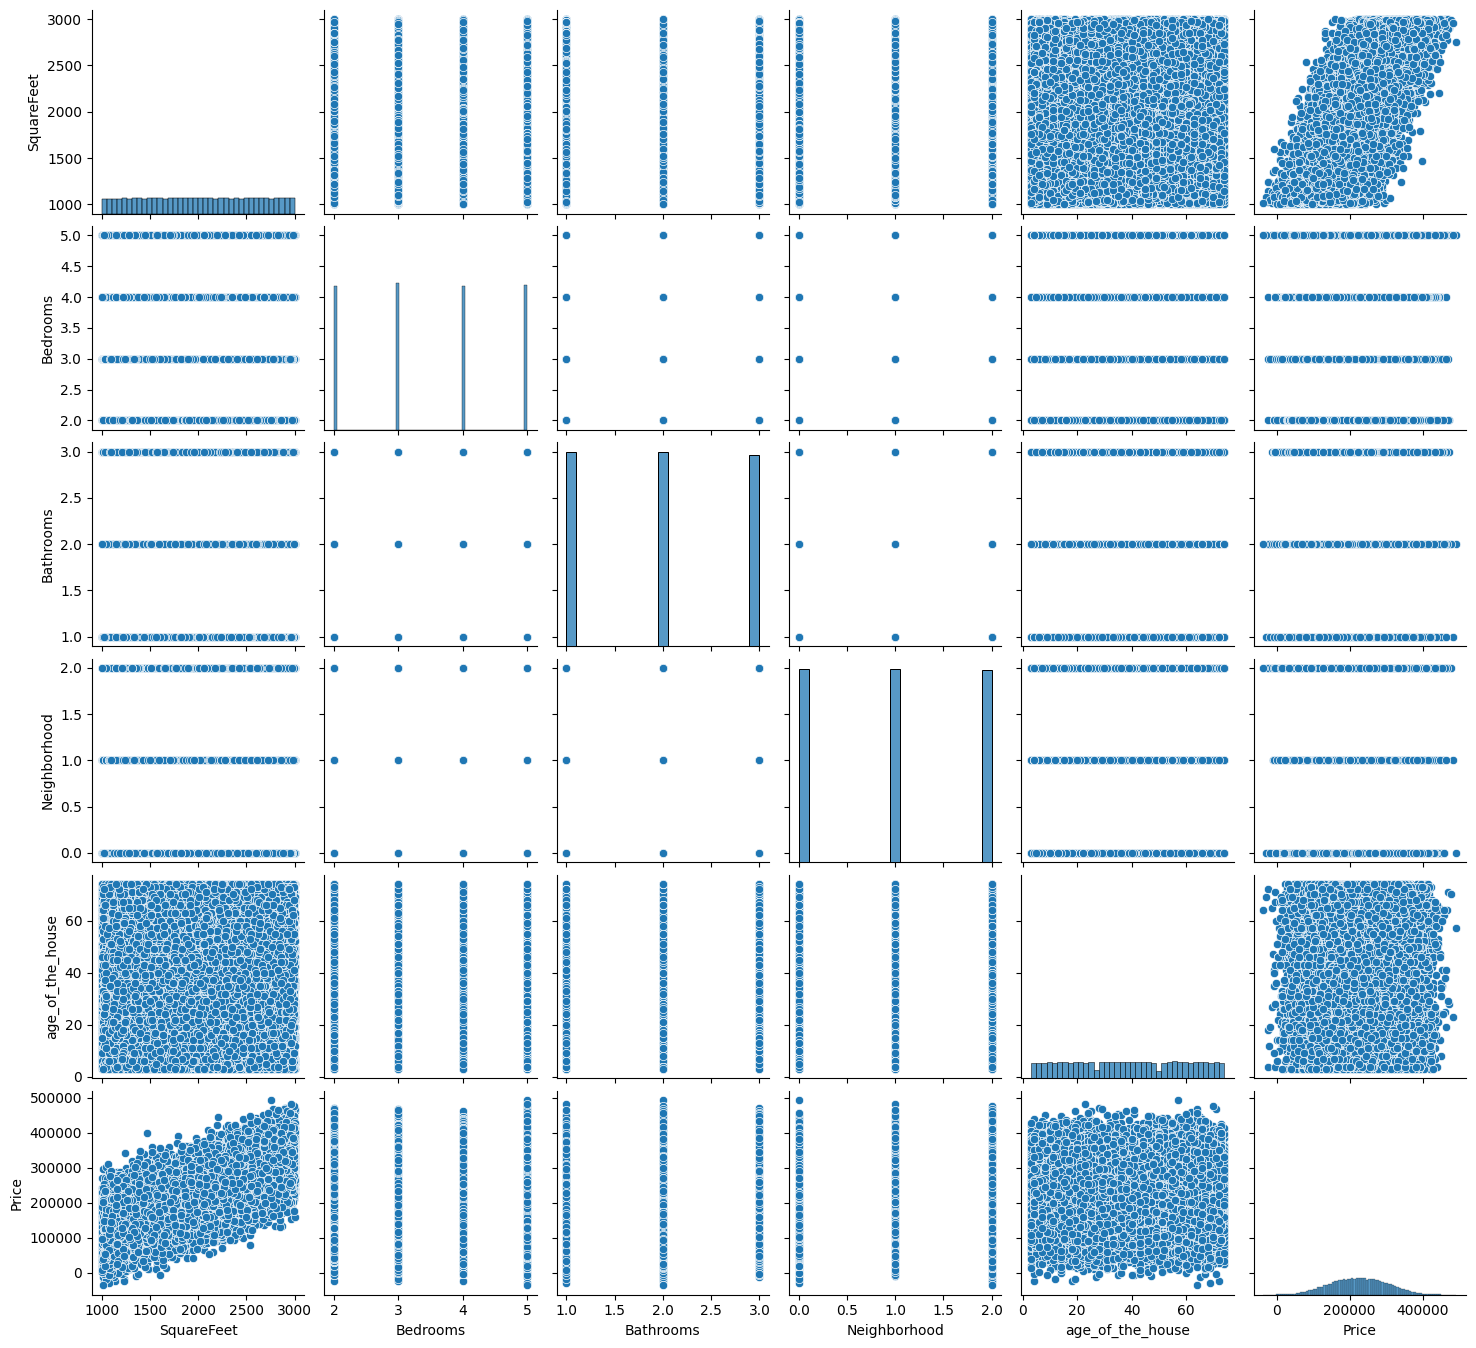

In [132]:
sns.pairplot(df)

# Adjust plot layout (optional)
plt.subplots_adjust(top=0.9)  # Adjust top margin for better title placement

# Display the plots
plt.show()

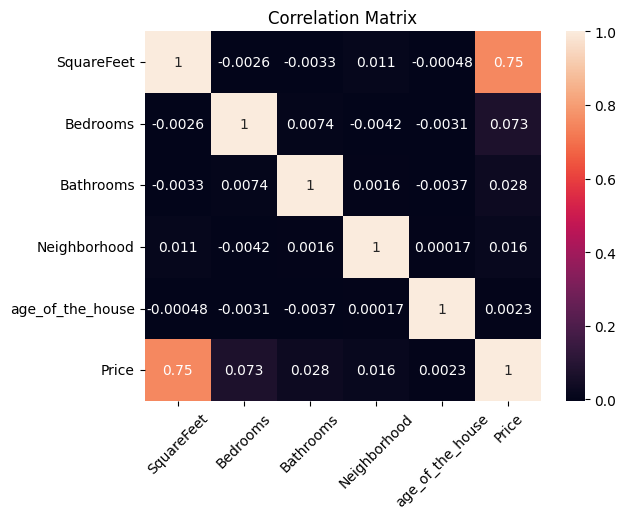

In [133]:
correlation_matrix = df.corr()

# Create a heatmap to visualize the correlations
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()

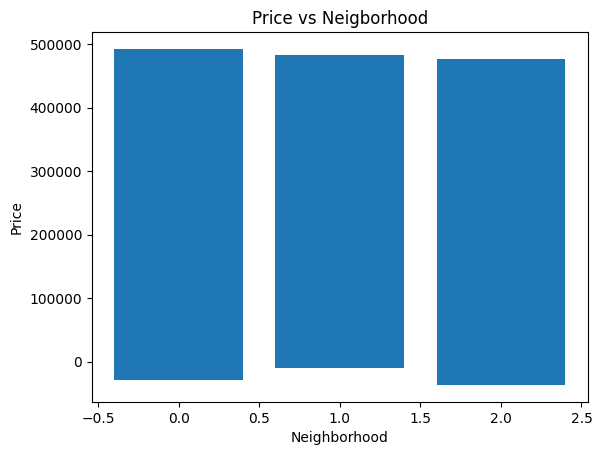

In [134]:
plt.bar(df.Neighborhood,df.Price)
plt.xlabel("Neighborhood")
plt.ylabel("Price")
plt.title("Price vs Neigborhood")
plt.show()

In [135]:
scaler = StandardScaler()
df = scaler.fit_transform(df)  # Fit the scaler and transform the data
print(df)


[[ 2.07860580e-01  4.49066952e-01 -1.22011292e+00 -1.22395663e+00
   7.91750847e-01 -1.24401195e-01]
 [ 7.86480334e-01 -4.46737860e-01  5.61382849e-03 -1.22395663e+00
   2.60841536e-01 -3.91550828e-01]
 [-2.54340184e-01 -1.34254267e+00 -1.22011292e+00  1.78958949e-03
   7.43486364e-01  1.07778462e+00]
 ...
 [ 1.69003070e+00  1.34487176e+00  1.23134057e+00  1.78958949e-03
   1.12960223e+00  2.09194862e+00]
 [ 1.02453110e+00  1.34487176e+00  5.61382849e-03 -1.22395663e+00
   6.77836050e-02  2.04469595e+00]
 [-7.54768079e-01  1.34487176e+00  1.23134057e+00 -1.22395663e+00
  -1.23535743e+00 -4.21420588e-02]]


In [151]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

X = df[:,:5]
y = df[:,5]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
Lr_model = LinearRegression()
Lr_model.fit(X_train, y_train)

# Make predictions on test set
predictions = Lr_model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse:.2f}")
r2 = r2_score(y_test, predictions)*100
print(f"Mean Absolute Error: {mean_absolute_error(y_test, predictions):.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 0.42
Mean Absolute Error: 0.52
R-squared: 57.54


In [143]:

from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor



In [144]:
lasso_reg = Lasso(alpha=0.1)  # Adjust alpha for regularization strength
lasso_reg.fit(X_train, y_train)

y_pred_lasso = lasso_reg.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"Lasso Regression R-squared: {r2_lasso:.2f}")


Lasso Regression R-squared: 0.56


In [145]:
ridge_reg = Ridge(alpha=1.0)  # Adjust alpha for regularization strength
ridge_reg.fit(X_train, y_train)

y_pred_ridge = ridge_reg.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Ridge Regression R-squared: {r2_ridge:.2f}")


Ridge Regression R-squared: 0.58


In [149]:
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

y_pred_rf = random_forest.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forests R-squared: {r2_rf:.2f}")


Random Forests R-squared: 0.52


In [150]:
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost R-squared: {r2_xgb:.2f}")


XGBoost R-squared: 0.56


In [152]:
import pickle
pickle_out = open("house_price_model.pkl", "wb")
pickle.dump(Lr_model, pickle_out)
pickle_out.close()